In [64]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)         # show all columns
pd.set_option('display.expand_frame_repr', False)  # disable wrapping


In [65]:
df_train = pd.read_csv('../data/train.csv')
print(df_train.head())

   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S


<function matplotlib.pyplot.show(close=None, block=None)>

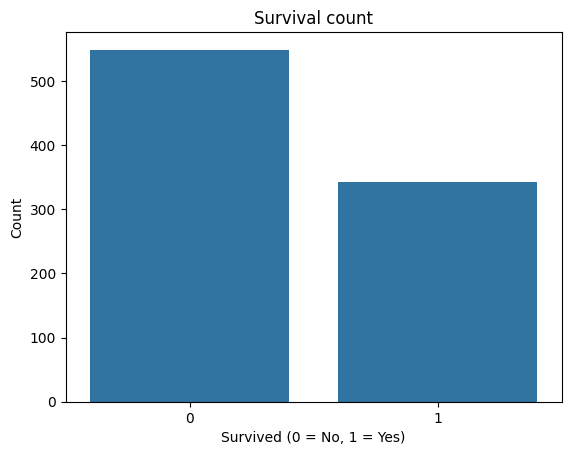

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Survived', data=df_train)
plt.title('Survival count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show

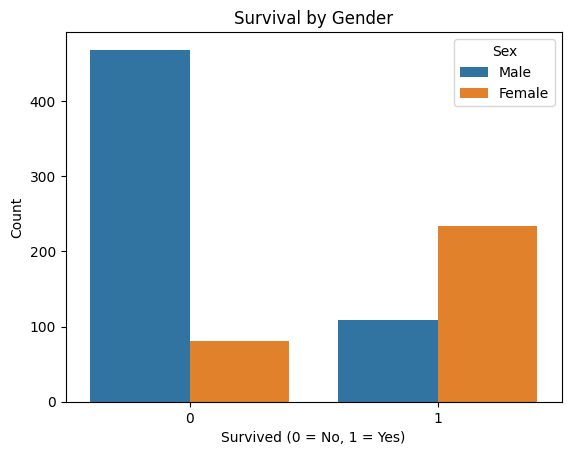

In [67]:
sns.countplot(x='Survived', hue='Sex', data=df_train)
plt.title('Survival by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.show()

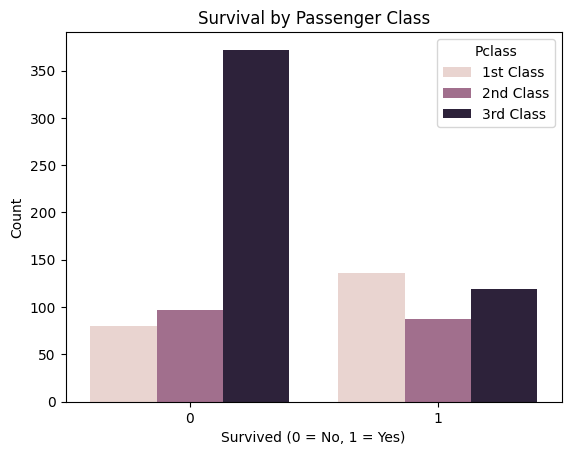

In [68]:
sns.countplot(x='Survived', hue='Pclass', data=df_train)
plt.title('Survival by Passenger Class')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Pclass', labels=['1st Class', '2nd Class', '3rd Class'])
plt.show()

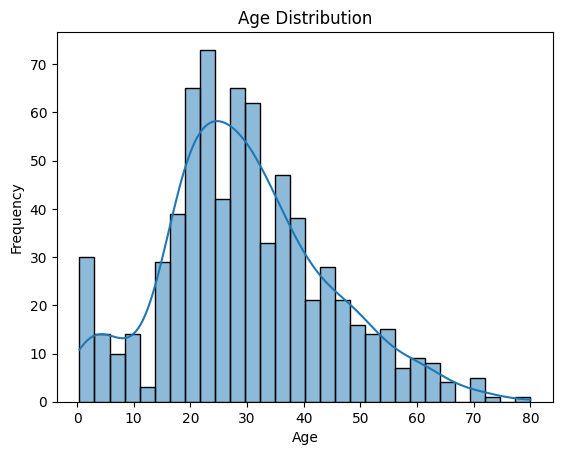

In [69]:
sns.histplot(df_train['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

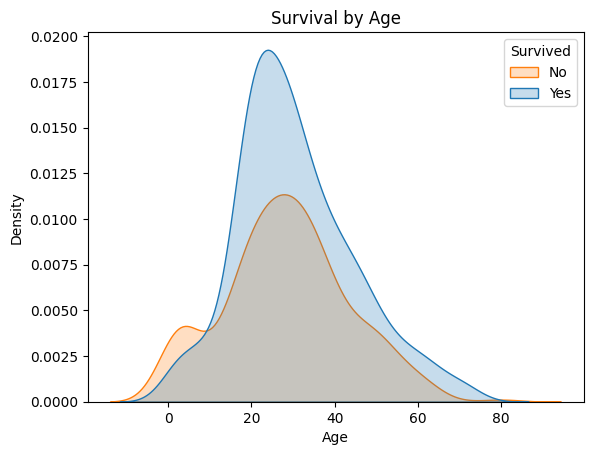

In [70]:
sns.kdeplot(data=df_train, x='Age', hue='Survived', fill=True)
plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

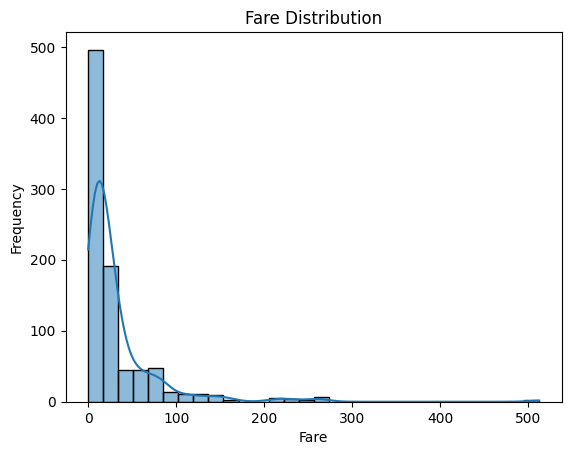

In [71]:
sns.histplot(df_train['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

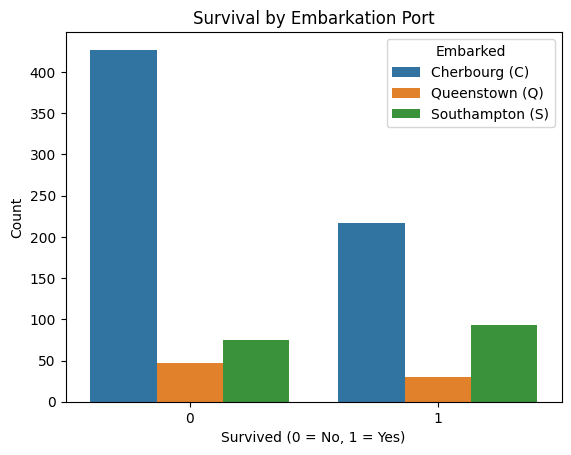

In [72]:
sns.countplot(x='Survived', hue='Embarked', data=df_train)
plt.title('Survival by Embarkation Port')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Embarked', labels=['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'])
plt.show()

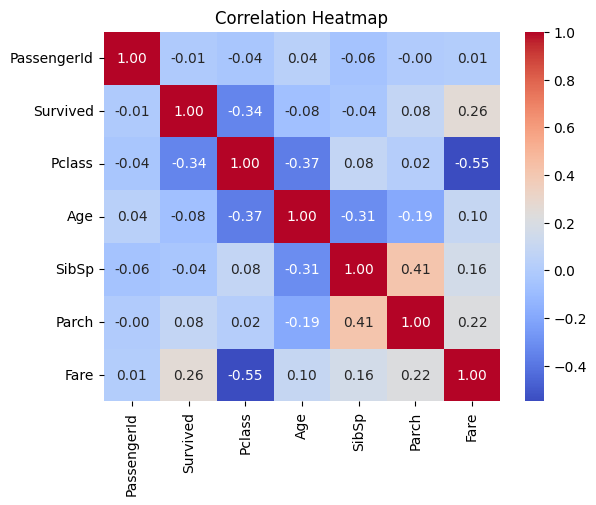

In [73]:
# Select only numerical columns
correlation_matrix = df_train.select_dtypes(include=['number']).corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [74]:
df_train['Sex'] = df_train['Sex'].map({'male': 0 , 'female': 1})
print(df_train.head())

   PassengerId  Survived  Pclass                                               Name  Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    0  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    0  35.0      0      0            373450   8.0500   NaN        S


In [75]:
# Count the number of missing values in the Age column
missing_age_count = df_train['Age'].isnull().sum()
print(f"Number of missing values in Age: {missing_age_count}")

Number of missing values in Age: 177


In [76]:
# Fill missing Age values with the median
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

# Bin ages into categories
df_train['AgeBin'] = pd.cut(df_train['Age'], bins=[0, 12, 18, 35, 60, 80], labels=[0, 1, 2, 3, 4])

print(df_train[['Age', 'AgeBin']].head())

    Age AgeBin
0  22.0      2
1  38.0      3
2  26.0      2
3  35.0      2
4  35.0      2


In [77]:
print(df_train.head())

   PassengerId  Survived  Pclass                                               Name  Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked AgeBin
0            1         0       3                            Braund, Mr. Owen Harris    0  22.0      1      0         A/5 21171   7.2500   NaN        S      2
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0          PC 17599  71.2833   C85        C      3
2            3         1       3                             Heikkinen, Miss. Laina    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S      2
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0            113803  53.1000  C123        S      2
4            5         0       3                           Allen, Mr. William Henry    0  35.0      0      0            373450   8.0500   NaN        S      2


In [78]:
# Extract titles from the 'Name' column
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Map rare titles to a common category
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
df_train['Title'] = df_train['Title'].replace(rare_titles, 'Rare')
df_train['Title'] = df_train['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# Encode titles numerically
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
df_train['Title'] = df_train['Title'].map(title_mapping)

print(df_train.head())

   PassengerId  Survived  Pclass                                               Name  Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked AgeBin  Title
0            1         0       3                            Braund, Mr. Owen Harris    0  22.0      1      0         A/5 21171   7.2500   NaN        S      2      1
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0          PC 17599  71.2833   C85        C      3      3
2            3         1       3                             Heikkinen, Miss. Laina    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S      2      2
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0            113803  53.1000  C123        S      2      3
4            5         0       3                           Allen, Mr. William Henry    0  35.0      0      0            373450   8.0500   NaN        S      2      1


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/yn/2lkq6t6d0ns6d9pql61jch8h0000gn/T/ipykernel_5490/1001039989.py:2: SyntaxWarning: invalid escape sequence '\.'
  df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [79]:
# Create FamilySize feature
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1  # Add 1 to include the passenger themselves

# Create IsAlone feature
df_train['IsAlone'] = (df_train['FamilySize'] == 1).astype(int)

print(df_train.head())

   PassengerId  Survived  Pclass                                               Name  Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked AgeBin  Title  FamilySize  IsAlone
0            1         0       3                            Braund, Mr. Owen Harris    0  22.0      1      0         A/5 21171   7.2500   NaN        S      2      1           2        0
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0          PC 17599  71.2833   C85        C      3      3           2        0
2            3         1       3                             Heikkinen, Miss. Laina    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S      2      2           1        1
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0            113803  53.1000  C123        S      2      3           2        0
4            5         0       3                           Allen, Mr. 

In [80]:
# Count the number of missing values in the Fare column
missing_fare_count = df_train['Fare'].isnull().sum()
print(f"Number of missing values in Fare: {missing_fare_count}")

Number of missing values in Fare: 0


In [81]:
# Bin fares into categories
df_train['FareBin'] = pd.qcut(df_train['Fare'], q=4, labels=[0, 1, 2, 3])

print(df_train.head())

   PassengerId  Survived  Pclass                                               Name  Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked AgeBin  Title  FamilySize  IsAlone FareBin
0            1         0       3                            Braund, Mr. Owen Harris    0  22.0      1      0         A/5 21171   7.2500   NaN        S      2      1           2        0       0
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0          PC 17599  71.2833   C85        C      3      3           2        0       3
2            3         1       3                             Heikkinen, Miss. Laina    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S      2      2           1        1       1
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0            113803  53.1000  C123        S      2      3           2        0       3
4            5         0      

Grouped Statistics for Embarked with Survived:
              mean  count  sum
Embarked                      
C         0.553571    168   93
Q         0.389610     77   30
S         0.336957    644  217


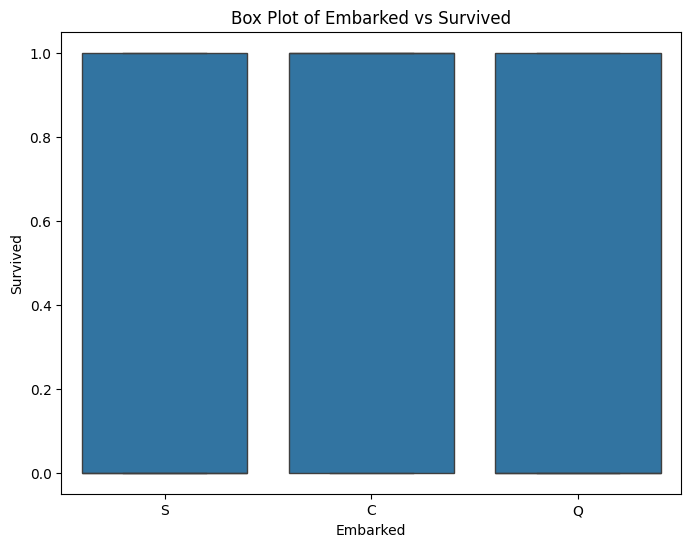

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouped statistics for Embarked with Survived
grouped_stats = df_train.groupby('Embarked')['Survived'].agg(['mean', 'count', 'sum'])
print("Grouped Statistics for Embarked with Survived:")
print(grouped_stats)

# Box plot for Embarked with Survived
plt.figure(figsize=(8, 6))
sns.boxplot(x='Embarked', y='Survived', data=df_train)
plt.title('Box Plot of Embarked vs Survived')
plt.xlabel('Embarked')
plt.ylabel('Survived')
plt.show()

In [83]:
df_train['Embarked'] = df_train['Embarked'].map({'S': 0 , 'C': 1, 'Q': 2})
print(df_train.head())

   PassengerId  Survived  Pclass                                               Name  Sex   Age  SibSp  Parch            Ticket     Fare Cabin  Embarked AgeBin  Title  FamilySize  IsAlone FareBin
0            1         0       3                            Braund, Mr. Owen Harris    0  22.0      1      0         A/5 21171   7.2500   NaN       0.0      2      1           2        0       0
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0          PC 17599  71.2833   C85       1.0      3      3           2        0       3
2            3         1       3                             Heikkinen, Miss. Laina    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN       0.0      2      2           1        1       1
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0            113803  53.1000  C123       0.0      2      3           2        0       3
4            5         0 

In [84]:
# Create FarePerPerson feature
df_train['FarePerPerson'] = df_train['Fare'] / df_train['FamilySize']

print(df_train.head())

   PassengerId  Survived  Pclass                                               Name  Sex   Age  SibSp  Parch            Ticket     Fare Cabin  Embarked AgeBin  Title  FamilySize  IsAlone FareBin  FarePerPerson
0            1         0       3                            Braund, Mr. Owen Harris    0  22.0      1      0         A/5 21171   7.2500   NaN       0.0      2      1           2        0       0        3.62500
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0          PC 17599  71.2833   C85       1.0      3      3           2        0       3       35.64165
2            3         1       3                             Heikkinen, Miss. Laina    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN       0.0      2      2           1        1       1        7.92500
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0            113803  53.1000  C123       0.0      2  

In [85]:
# Survival rates by Pclass
pclass_survival = df_train.groupby('Pclass')['Survived'].mean()
print("Survival Rates by Pclass:")
print(pclass_survival)

Survival Rates by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


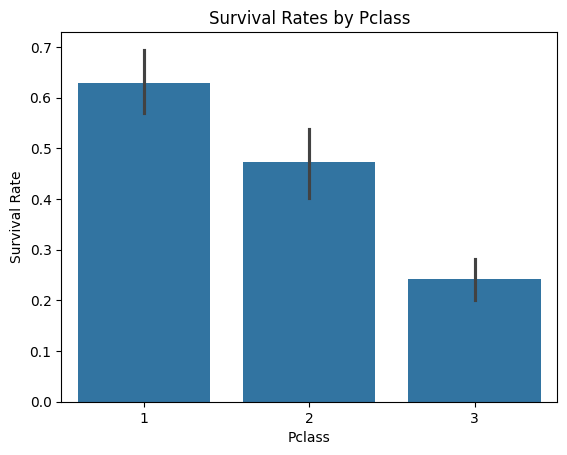

In [86]:
# Bar plot for survival rates by Pclass
sns.barplot(x='Pclass', y='Survived', data=df_train)
plt.title('Survival Rates by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

In [87]:
# Count missing values in Cabin
missing_cabin_count = df_train['Cabin'].isnull().sum()
print(f"Number of missing values in Cabin: {missing_cabin_count}")

Number of missing values in Cabin: 687


In [88]:
# Extract deck information from Cabin
df_train['Deck'] = df_train['Cabin'].str[0]
print(df_train['Deck'].value_counts())

Deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64


In [89]:
print(df_train.head())

   PassengerId  Survived  Pclass                                               Name  Sex   Age  SibSp  Parch            Ticket     Fare Cabin  Embarked AgeBin  Title  FamilySize  IsAlone FareBin  FarePerPerson Deck
0            1         0       3                            Braund, Mr. Owen Harris    0  22.0      1      0         A/5 21171   7.2500   NaN       0.0      2      1           2        0       0        3.62500  NaN
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0          PC 17599  71.2833   C85       1.0      3      3           2        0       3       35.64165    C
2            3         1       3                             Heikkinen, Miss. Laina    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN       0.0      2      2           1        1       1        7.92500  NaN
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0            113803  53.1000  C12

In [90]:
df_train['Deck'].fillna('Unknown', inplace=True)

/var/folders/yn/2lkq6t6d0ns6d9pql61jch8h0000gn/T/ipykernel_5490/4283036432.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Deck'].fillna('Unknown', inplace=True)


In [91]:
deck_survival = df_train.groupby('Deck')['Survived'].mean()
print(deck_survival)

Deck
A          0.466667
B          0.744681
C          0.593220
D          0.757576
E          0.750000
F          0.615385
G          0.500000
T          0.000000
Unknown    0.299854
Name: Survived, dtype: float64


In [92]:
df_train['HasCabin'] = df_train['Cabin'].notnull().astype(int)
print(df_train.head())

   PassengerId  Survived  Pclass                                               Name  Sex   Age  SibSp  Parch            Ticket     Fare Cabin  Embarked AgeBin  Title  FamilySize  IsAlone FareBin  FarePerPerson     Deck  HasCabin
0            1         0       3                            Braund, Mr. Owen Harris    0  22.0      1      0         A/5 21171   7.2500   NaN       0.0      2      1           2        0       0        3.62500  Unknown         0
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0          PC 17599  71.2833   C85       1.0      3      3           2        0       3       35.64165        C         1
2            3         1       3                             Heikkinen, Miss. Laina    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN       0.0      2      2           1        1       1        7.92500  Unknown         0
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel) 

In [93]:
# Find the most common deck for each Pclass
most_common_deck_per_pclass = df_train.groupby('Pclass')['Deck'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')

# Fill missing Deck values with the most common deck for that Pclass
df_train['Deck'] = df_train.apply(
    lambda row: most_common_deck_per_pclass[row['Pclass']] if pd.isnull(row['Deck']) or row['Deck'] == 'Unknown' else row['Deck'],
    axis=1
)

print(df_train['Deck'].value_counts())

Deck
Unknown    647
C           99
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: count, dtype: int64


In [94]:
# Find the most common deck for each Pclass
most_common_deck_per_pclass = df_train[df_train['Deck'] != 'Unknown'].groupby('Pclass')['Deck'].agg(lambda x: x.mode().iloc[0])

# Fill 'Unknown' decks with the most common deck for that Pclass
df_train['Deck'] = df_train.apply(
    lambda row: most_common_deck_per_pclass[row['Pclass']] if row['Deck'] == 'Unknown' else row['Deck'],
    axis=1
)

print(df_train['Deck'].value_counts())

Deck
F    660
C     99
B     47
D     33
E     32
A     15
G      4
T      1
Name: count, dtype: int64


In [95]:
print(df_train.head())

   PassengerId  Survived  Pclass                                               Name  Sex   Age  SibSp  Parch            Ticket     Fare Cabin  Embarked AgeBin  Title  FamilySize  IsAlone FareBin  FarePerPerson Deck  HasCabin
0            1         0       3                            Braund, Mr. Owen Harris    0  22.0      1      0         A/5 21171   7.2500   NaN       0.0      2      1           2        0       0        3.62500    F         0
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0          PC 17599  71.2833   C85       1.0      3      3           2        0       3       35.64165    C         1
2            3         1       3                             Heikkinen, Miss. Laina    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN       0.0      2      2           1        1       1        7.92500    F         0
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      

In [96]:
deck_survival = df_train.groupby('Deck')['Survived'].mean()
print(deck_survival)

Deck
A    0.466667
B    0.744681
C    0.545455
D    0.757576
E    0.750000
F    0.295455
G    0.500000
T    0.000000
Name: Survived, dtype: float64


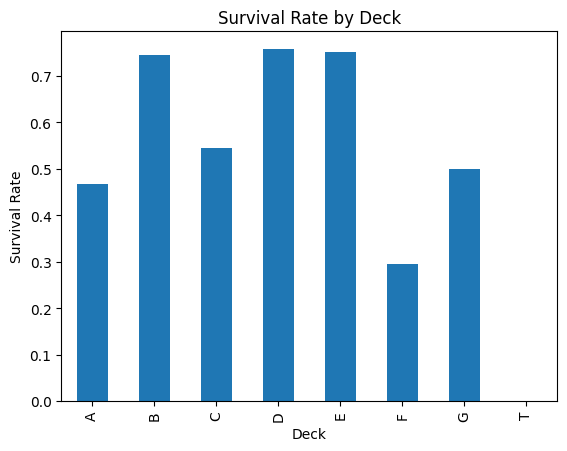

In [97]:
import matplotlib.pyplot as plt

deck_survival.plot(kind='bar')
plt.title('Survival Rate by Deck')
plt.xlabel('Deck')
plt.ylabel('Survival Rate')
plt.show()

In [98]:
# Remove rows where Deck is 'T'
df_train = df_train[df_train['Deck'] != 'T']

# Merge decks 'D' and 'E' into 'DE'
df_train['Deck'] = df_train['Deck'].replace({'D': 'DE', 'E': 'DE'})

# Assign ordinal values with 'DE' as 1
deck_mapping = {'DE': 1, 'B': 2, 'C': 3, 'A': 4, 'G': 5, 'F': 6}
df_train['Deck_Ordinal'] = df_train['Deck'].map(deck_mapping)

print(df_train['Deck'].value_counts())
print(df_train[['Deck', 'Deck_Ordinal']].head())

Deck
F     660
C      99
DE     65
B      47
A      15
G       4
Name: count, dtype: int64
  Deck  Deck_Ordinal
0    F             6
1    C             3
2    F             6
3    C             3
4    F             6


In [99]:
print(df_train.head())

   PassengerId  Survived  Pclass                                               Name  Sex   Age  SibSp  Parch            Ticket     Fare Cabin  Embarked AgeBin  Title  FamilySize  IsAlone FareBin  FarePerPerson Deck  HasCabin  Deck_Ordinal
0            1         0       3                            Braund, Mr. Owen Harris    0  22.0      1      0         A/5 21171   7.2500   NaN       0.0      2      1           2        0       0        3.62500    F         0             6
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0          PC 17599  71.2833   C85       1.0      3      3           2        0       3       35.64165    C         1             3
2            3         1       3                             Heikkinen, Miss. Laina    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN       0.0      2      2           1        1       1        7.92500    F         0             6
3            4         1       1       Futre

In [100]:
# Correlation between HasCabin and Survived
correlation = df_train['HasCabin'].corr(df_train['Survived'])
print(f"Correlation between HasCabin and Survived: {correlation:.4f}")

Correlation between HasCabin and Survived: 0.3193


In [101]:
# Survival rate by HasCabin
print(df_train.groupby('HasCabin')['Survived'].mean())

HasCabin
0    0.299854
1    0.669951
Name: Survived, dtype: float64


In [102]:
print(df_train.head())

   PassengerId  Survived  Pclass                                               Name  Sex   Age  SibSp  Parch            Ticket     Fare Cabin  Embarked AgeBin  Title  FamilySize  IsAlone FareBin  FarePerPerson Deck  HasCabin  Deck_Ordinal
0            1         0       3                            Braund, Mr. Owen Harris    0  22.0      1      0         A/5 21171   7.2500   NaN       0.0      2      1           2        0       0        3.62500    F         0             6
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0          PC 17599  71.2833   C85       1.0      3      3           2        0       3       35.64165    C         1             3
2            3         1       3                             Heikkinen, Miss. Laina    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN       0.0      2      2           1        1       1        7.92500    F         0             6
3            4         1       1       Futre

In [103]:
# Drop unnecessary columns
df_train = df_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Fare','HasCabin'])

print(df_train.head())

   Survived  Pclass  Sex   Age  Embarked AgeBin  Title  FamilySize  IsAlone FareBin  FarePerPerson Deck  Deck_Ordinal
0         0       3    0  22.0       0.0      2      1           2        0       0        3.62500    F             6
1         1       1    1  38.0       1.0      3      3           2        0       3       35.64165    C             3
2         1       3    1  26.0       0.0      2      2           1        1       1        7.92500    F             6
3         1       1    1  35.0       0.0      2      3           2        0       3       26.55000    C             3
4         0       3    0  35.0       0.0      2      1           1        1       1        8.05000    F             6


In [104]:
print(df_train.isnull().sum())

Survived         0
Pclass           0
Sex              0
Age              0
Embarked         2
AgeBin           0
Title            0
FamilySize       0
IsAlone          0
FareBin          0
FarePerPerson    0
Deck             0
Deck_Ordinal     0
dtype: int64


In [105]:
# Drop rows where Embarked is missing
df_train = df_train[df_train['Embarked'].notnull()]

print(df_train.isnull().sum())

Survived         0
Pclass           0
Sex              0
Age              0
Embarked         0
AgeBin           0
Title            0
FamilySize       0
IsAlone          0
FareBin          0
FarePerPerson    0
Deck             0
Deck_Ordinal     0
dtype: int64


In [106]:
print(df_train.head())

   Survived  Pclass  Sex   Age  Embarked AgeBin  Title  FamilySize  IsAlone FareBin  FarePerPerson Deck  Deck_Ordinal
0         0       3    0  22.0       0.0      2      1           2        0       0        3.62500    F             6
1         1       1    1  38.0       1.0      3      3           2        0       3       35.64165    C             3
2         1       3    1  26.0       0.0      2      2           1        1       1        7.92500    F             6
3         1       1    1  35.0       0.0      2      3           2        0       3       26.55000    C             3
4         0       3    0  35.0       0.0      2      1           1        1       1        8.05000    F             6


In [107]:
# Drop Deck as well since we have Deck_Ordinal
df_train = df_train.drop(columns=['Deck'])

print(df_train.head())

   Survived  Pclass  Sex   Age  Embarked AgeBin  Title  FamilySize  IsAlone FareBin  FarePerPerson  Deck_Ordinal
0         0       3    0  22.0       0.0      2      1           2        0       0        3.62500             6
1         1       1    1  38.0       1.0      3      3           2        0       3       35.64165             3
2         1       3    1  26.0       0.0      2      2           1        1       1        7.92500             6
3         1       1    1  35.0       0.0      2      3           2        0       3       26.55000             3
4         0       3    0  35.0       0.0      2      1           1        1       1        8.05000             6


In [108]:
# Drop Age as well since we have Age_Bin
df_train = df_train.drop(columns=['Age'])

print(df_train.head())

   Survived  Pclass  Sex  Embarked AgeBin  Title  FamilySize  IsAlone FareBin  FarePerPerson  Deck_Ordinal
0         0       3    0       0.0      2      1           2        0       0        3.62500             6
1         1       1    1       1.0      3      3           2        0       3       35.64165             3
2         1       3    1       0.0      2      2           1        1       1        7.92500             6
3         1       1    1       0.0      2      3           2        0       3       26.55000             3
4         0       3    0       0.0      2      1           1        1       1        8.05000             6


In [109]:
# Identify numerical features
numerical_features = ['FarePerPerson']

In [110]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to numerical features
df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])

# Verify the scaled features
print(df_train[numerical_features].head())

   FarePerPerson
0      -0.451250
1       0.443971
2      -0.331018
3       0.189758
4      -0.327522


In [111]:
# Define features (X) and target (y)
X = df_train.drop('Survived', axis=1)  # Drop the target column
y = df_train['Survived']              # Target variable

In [112]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8202247191011236
Confusion Matrix:
 [[94 21]
 [11 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.85       115
           1       0.71      0.83      0.76        63

    accuracy                           0.82       178
   macro avg       0.80      0.82      0.81       178
weighted avg       0.83      0.82      0.82       178



In [114]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8089887640449438
SVM Confusion Matrix:
 [[94 21]
 [13 50]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       115
           1       0.70      0.79      0.75        63

    accuracy                           0.81       178
   macro avg       0.79      0.81      0.80       178
weighted avg       0.82      0.81      0.81       178



In [115]:
# Revert scaled features to original scale
df_train[numerical_features] = scaler.inverse_transform(df_train[numerical_features])

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7921348314606742
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       115
           1       0.70      0.71      0.71        63

    accuracy                           0.79       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



In [117]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.797752808988764
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       115
           1       0.71      0.73      0.72        63

    accuracy                           0.80       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



In [118]:
# Convert AgeBin and FareBin to int
X_train['AgeBin'] = X_train['AgeBin'].astype(int)
X_test['AgeBin'] = X_test['AgeBin'].astype(int)
X_train['FareBin'] = X_train['FareBin'].astype(int)
X_test['FareBin'] = X_test['FareBin'].astype(int)

In [119]:
print(X_train.dtypes)

Pclass             int64
Sex                int64
Embarked         float64
AgeBin             int64
Title              int64
FamilySize         int64
IsAlone            int64
FareBin            int64
FarePerPerson    float64
Deck_Ordinal       int64
dtype: object


In [120]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state = 42, use_label_encoder = False, eval_metric = 'logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7865168539325843
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       115
           1       0.69      0.73      0.71        63

    accuracy                           0.79       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



In [121]:
import joblib

# Save the model
joblib.dump(logreg, '../models/logreg_model.pkl')

['../models/logreg_model.pkl']

In [122]:
# Load the Optuna-tuned XGBoost model
log_reg_model_loaded = joblib.load('../models/logreg_model.pkl')
print("Logistic regression model loaded successfully")

Logistic regression model loaded successfully
